In [1]:
!pip install Unidecode==1.3.4

In [2]:
import pandas as pd

resenha = pd.read_csv('data/imdb-reviews-pt-br.csv', usecols=['text_pt', 'sentiment'])
resenha.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, Y_train, Y_test = train_test_split(resenha.text_pt, resenha.sentiment,
                                                    stratify=resenha.sentiment, random_state=SEED,
                                                    test_size=0.25)

In [4]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy.score(X_test, Y_test)

0.5006874241811565

In [5]:
print('Negativa \n')
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [6]:
print('Positivo \n')
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [7]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [8]:
resenha_v1 = resenha.copy(deep=True)
resenha_v1['target'] = resenha.sentiment.replace({'neg': 0, 'pos': 1})
resenha_v1 = resenha_v1.drop(columns=['sentiment'])

resenha_v1.head()

,text_pt,target
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'Assisti um filme ótimo',
    'Assisti um filme ruim',
]

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(corpus)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [10]:
vectorized_corpus = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())
vectorized_corpus

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(resenha_v1.text_pt)

bag_of_words.shape

(49459, 50)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, resenha_v1.target,
                                                    stratify=resenha_v1.target, random_state=SEED,
                                                    test_size=0.25)

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

logistic_regression.score(X_test, Y_test)

0.6507076425394258

In [14]:
def classify_text(corpus, text_column, target_column):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(corpus[text_column])
    
    X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, corpus[target_column],
                                                        stratify=corpus[target_column], random_state=SEED,
                                                        test_size=0.25)
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, Y_train)

    return logistic_regression, logistic_regression.score(X_test, Y_test)

In [15]:
classify_text(resenha_v1, 'text_pt', 'target')

(LogisticRegression(), 0.6507076425394258)

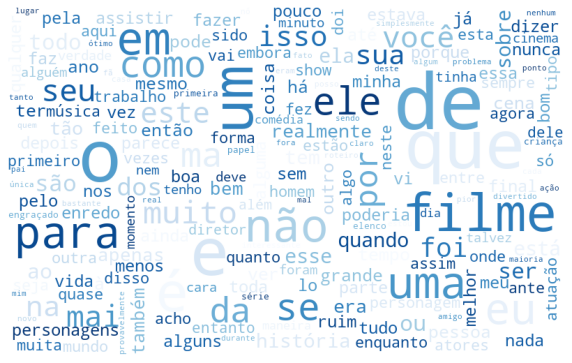

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

full_text = ' '.join([text for text in resenha_v1.text_pt])
word_cloud = WordCloud(background_color="white",
                       colormap='Blues',
                       max_font_size=110,
                       collocations=False,
                       width=800, height=500).generate(full_text)

_, ax = plt.subplots(figsize=(10, 7))

ax.imshow(word_cloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(word_cloud)
plt.show()

In [17]:
def generate_wordcloud(data, column, stopwords=[]):
    full_text = ' '.join([text for text in data[column]])
    word_cloud = WordCloud(stopwords=stopwords,
                           background_color="white",
                           colormap='Blues',
                           max_font_size=110,
                           collocations=False,
                           width=800, height=500).generate(full_text)

    _, ax = plt.subplots(figsize=(10, 7))

    ax.imshow(word_cloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(word_cloud)
    plt.show()

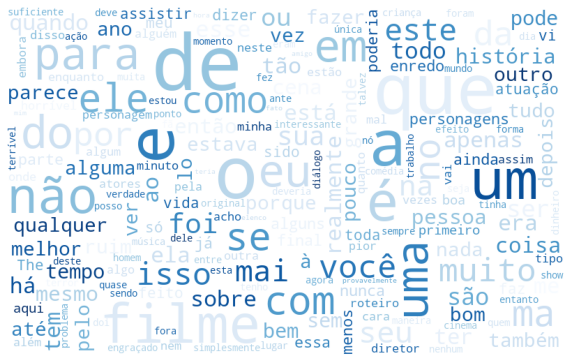

In [18]:
generate_wordcloud(resenha_v1.query('target == 0'), column='text_pt')

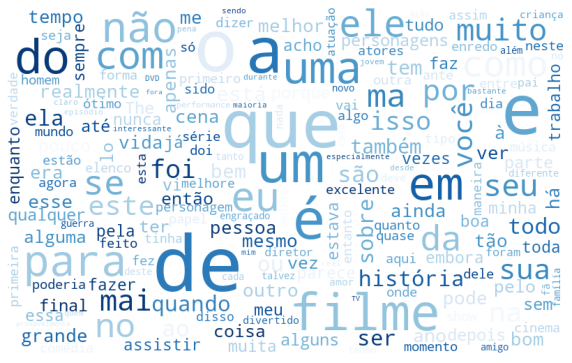

In [19]:
generate_wordcloud(resenha_v1.query('target == 1'), column='text_pt')

In [20]:
import nltk

corpus = [
    'Assisti um filme ótimo',
    'Assisti um filme ruim',
]

frequency = nltk.FreqDist(corpus)
frequency

FreqDist({'Assisti um filme ótimo': 1, 'Assisti um filme ruim': 1})

In [21]:
from nltk.tokenize import WhitespaceTokenizer

frase = 'Bem vindo ao mundo do NLP'
tokenizer = WhitespaceTokenizer()
tokens = tokenizer.tokenize(frase)

tokens

['Bem', 'vindo', 'ao', 'mundo', 'do', 'NLP']

In [22]:
tokenizer = WhitespaceTokenizer()
tokens = tokenizer.tokenize(full_text)
frequency = nltk.FreqDist(tokens)

In [23]:
df_frequency = pd.DataFrame({'palavra': list(frequency.keys()),
                             'frequencia': list(frequency.values())})
df_frequency.nlargest(columns=['frequencia'], n=10)

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


Text(0, 0.5, 'Frequência')

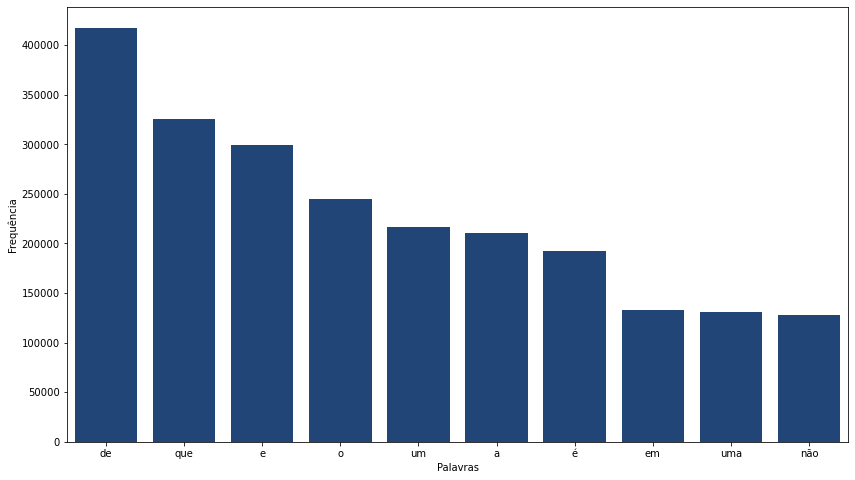

In [24]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='palavra', y='frequencia',
            data=df_frequency.nlargest(columns=['frequencia'], n=10),
            color='#144385')
plt.xlabel('Palavras')
plt.ylabel('Frequência')

In [25]:
def plot_word_frequency(data, column, n_words=10, stopwords=[]):
    full_text = ' '.join([text for text in data[column]])
    
    tokenizer = WhitespaceTokenizer()
    tokens = [token for token in tokenizer.tokenize(full_text) if not (token in stopwords)]
    frequency = nltk.FreqDist(tokens)
    
    df_frequency = pd.DataFrame({'palavra': list(frequency.keys()),
                                 'frequencia': list(frequency.values())})

    plt.figure(figsize=(14, 8))
    sns.barplot(x='palavra', y='frequencia',
                data=df_frequency.nlargest(columns=['frequencia'], n=n_words),
                color='#144385')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')

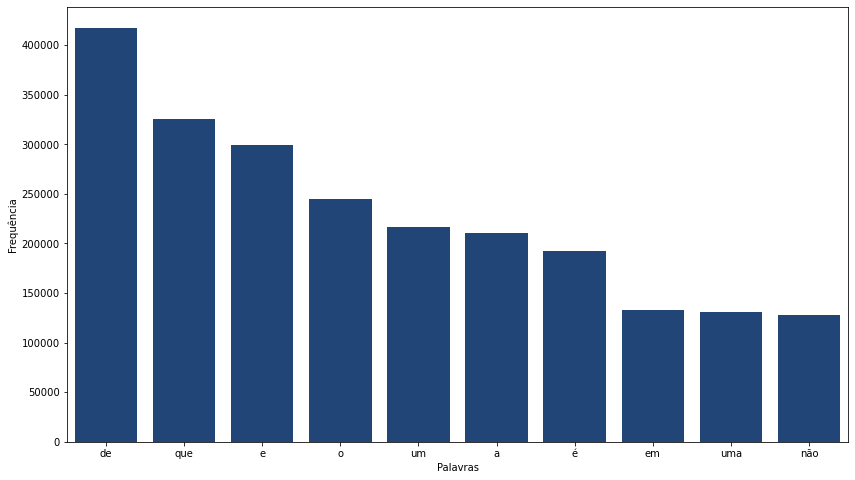

In [26]:
plot_word_frequency(
    data=resenha_v1,
    column='text_pt',
    n_words=10,
)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stopwords = nltk.corpus.stopwords.words('portuguese')

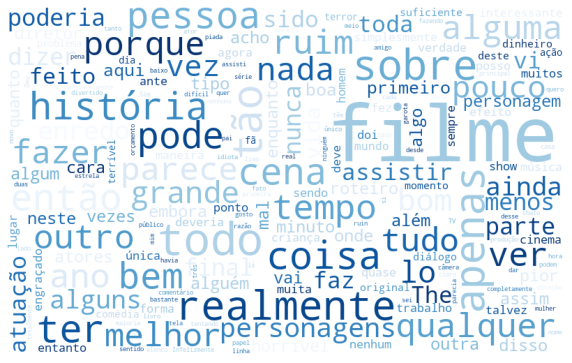

In [29]:
generate_wordcloud(resenha_v1.query('target == 0'), column='text_pt', stopwords=stopwords)

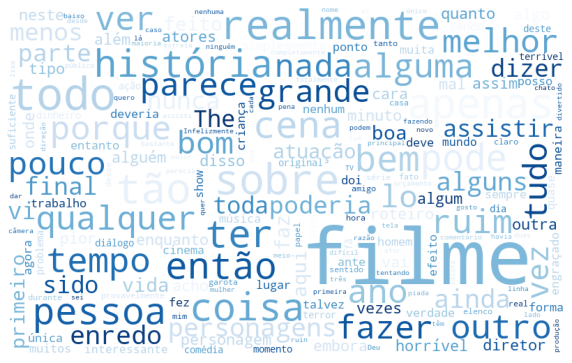

In [30]:
generate_wordcloud(resenha_v1.query('target == 0'), column='text_pt', stopwords=stopwords)

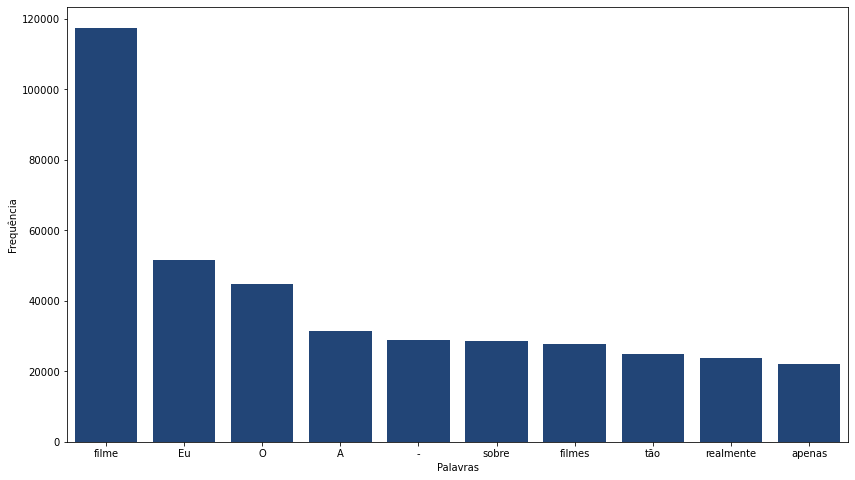

In [31]:
plot_word_frequency(
    data=resenha_v1,
    column='text_pt',
    n_words=10,
    stopwords=stopwords,
)

In [32]:
resenha_v2 = resenha_v1.copy(deep=True)
resenha_v2['text_pt'] = resenha_v2['text_pt'].str.lower()

In [33]:
from string import punctuation

resenha_v3 = resenha_v2.copy(deep=True)
resenha_v3['text_pt'] = resenha_v3['text_pt'].map(
    lambda phrase: ''.join([letter for letter in phrase if letter not in punctuation])
)

resenha_v3.head()

,text_pt,target
0,mais uma vez o sr costner arrumou um filme por...,0
1,este é um exemplo do motivo pelo qual a maiori...,0
2,primeiro de tudo eu odeio esses raps imbecis q...,0
3,nem mesmo os beatles puderam escrever músicas ...,0
4,filmes de fotos de latão não é uma palavra apr...,0


In [34]:
stopwords_pattern = r'\b(?:{})\b'.format('|'.join(stopwords))

resenha_v4 = resenha_v3.copy(deep=True)
resenha_v4['text_pt'] = resenha_v4['text_pt'].str.replace(stopwords_pattern, '', regex=True)
resenha_v4['text_pt'] = resenha_v4['text_pt'].str.replace(r'\s+', ' ', regex=True)

resenha_v4.head()

,text_pt,target
0,vez sr costner arrumou filme tempo necessário...,0
1,exemplo motivo maioria filmes ação mesmos gen...,0
2,primeiro tudo odeio raps imbecis poderiam agir...,0
3,beatles puderam escrever músicas todos gostas...,0
4,filmes fotos latão palavra apropriada verdade ...,0


In [35]:
import unidecode

resenha_v5 = resenha_v4.copy(deep=True)
resenha_v5['text_pt'] = resenha_v5['text_pt'].map(
    lambda phrase: unidecode.unidecode(phrase)
)

resenha_v5.head()

,text_pt,target
0,vez sr costner arrumou filme tempo necessario...,0
1,exemplo motivo maioria filmes acao mesmos gen...,0
2,primeiro tudo odeio raps imbecis poderiam agir...,0
3,beatles puderam escrever musicas todos gostas...,0
4,filmes fotos latao palavra apropriada verdade ...,0


In [36]:
stopwords_pattern = r'\b(?:{})\b'.format('|'.join([unidecode.unidecode(word) for word in stopwords]))

resenha_v6 = resenha_v5.copy(deep=True)
resenha_v6['text_pt'] = resenha_v6['text_pt'].str.replace(stopwords_pattern, '', regex=True)
resenha_v6['text_pt'] = resenha_v6['text_pt'].str.replace(r'\s+', ' ', regex=True)

resenha_v6.head()

,text_pt,target
0,vez sr costner arrumou filme tempo necessario...,0
1,exemplo motivo maioria filmes acao mesmos gen...,0
2,primeiro tudo odeio raps imbecis poderiam agir...,0
3,beatles puderam escrever musicas todos gostas...,0
4,filmes fotos latao palavra apropriada verdade ...,0


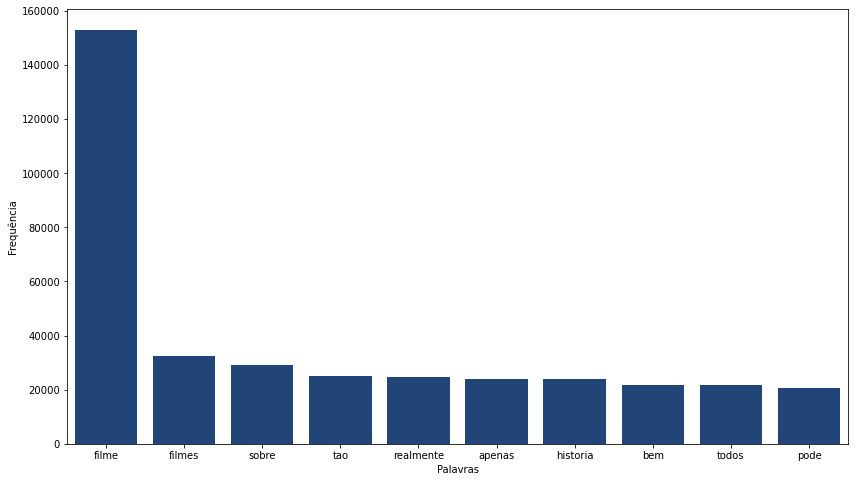

In [37]:
plot_word_frequency(
    data=resenha_v6,
    column='text_pt',
    n_words=10,
)

In [38]:
classify_text(resenha_v6, 'text_pt', 'target')

(LogisticRegression(), 0.6852405984634048)

In [39]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/jovyan/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [41]:
from nltk.stem.rslp import RSLPStemmer
from nltk.tokenize import WhitespaceTokenizer


def get_stems_from_phrase(phrase,
                          tokenizer=WhitespaceTokenizer(),
                          stemmer=RSLPStemmer()):
    tokens = tokenizer.tokenize(phrase)
    return ' '.join([stemmer.stem(token) for token in tokens])

In [43]:
resenha_v7 = resenha_v6.copy(deep=True)
resenha_v7['text_pt'] = resenha_v7['text_pt'].map(get_stems_from_phrase)

resenha_v7.head()

,text_pt,target
0,vez sr costn arrum film temp necessari alem te...,0
1,exempl motiv maior film aca mesm gener chat na...,0
2,prim tud odei rap imbecil pod agir arm pressio...,0
3,beatl pud escrev music tod gost emb walt hill ...,0
4,film fot lata palavr apropri verdad tant ous q...,0


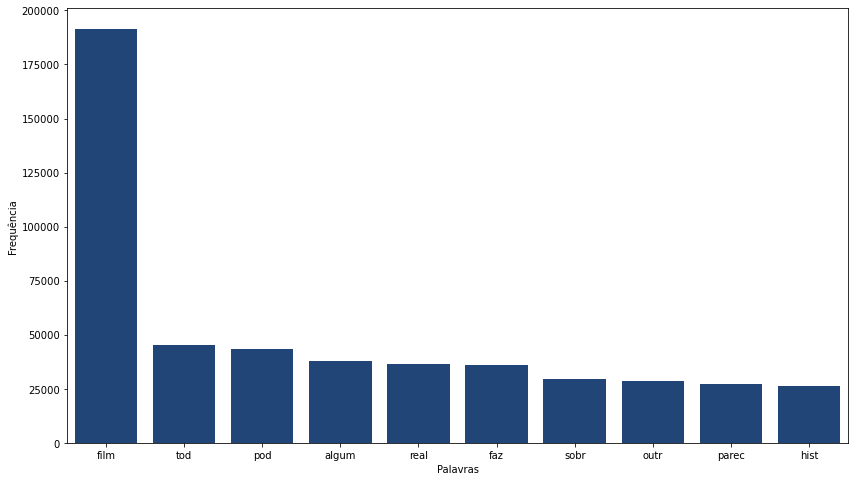

In [44]:
plot_word_frequency(
    data=resenha_v7,
    column='text_pt',
    n_words=10,
)

In [45]:
classify_text(resenha_v7, 'text_pt', 'target')

(LogisticRegression(), 0.6879094217549535)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer


def classify_text_tfidf(corpus, text_column, target_column):
    vectorizer = TfidfVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(corpus[text_column])
    
    X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, corpus[target_column],
                                                        stratify=corpus[target_column], random_state=SEED,
                                                        test_size=0.25)
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, Y_train)

    return logistic_regression, logistic_regression.score(X_test, Y_test)

In [47]:
classify_text_tfidf(resenha_v7, 'text_pt', 'target')

(LogisticRegression(), 0.6905782450465022)

In [76]:
def classify_text_tfidf_bigram(corpus, text_column, target_column):
    vectorizer = TfidfVectorizer(lowercase=False, max_features=1000,
                                 ngram_range=(1, 2))
    bag_of_words = vectorizer.fit_transform(corpus[text_column])
    
    X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, corpus[target_column],
                                                        stratify=corpus[target_column], random_state=SEED,
                                                        test_size=0.25)
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, Y_train)

    return logistic_regression, logistic_regression.score(X_test, Y_test)

In [77]:
classify_text_tfidf_bigram(resenha_v7, 'text_pt', 'target')

(LogisticRegression(), 0.8603315810756167)

In [78]:
from sklearn.naive_bayes import MultinomialNB


def classify_text_tfidf_bigram_nb(corpus, text_column, target_column):
    vectorizer = TfidfVectorizer(lowercase=False, max_features=1500,
                                 ngram_range=(1, 2))
    bag_of_words = vectorizer.fit_transform(corpus[text_column])
    
    X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, corpus[target_column],
                                                        stratify=corpus[target_column], random_state=SEED,
                                                        test_size=0.25)
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, Y_train)

    return nb_clf, nb_clf.score(X_test, Y_test)

In [79]:
classify_text_tfidf_bigram_nb(resenha_v7, 'text_pt', 'target')

(MultinomialNB(), 0.8437525272947837)

In [84]:
from sklearn.ensemble import AdaBoostClassifier


def classify_text_tfidf_bigram_ada(corpus, text_column, target_column):
    vectorizer = TfidfVectorizer(lowercase=False, max_features=1000,
                                 ngram_range=(2, 3))
    bag_of_words = vectorizer.fit_transform(corpus[text_column])
    
    X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, corpus[target_column],
                                                        stratify=corpus[target_column], random_state=SEED,
                                                        test_size=0.25)
    ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7, random_state=SEED)
    ada_clf.fit(X_train, Y_train)

    return ada_clf, ada_clf.score(X_test, Y_test)

In [85]:
classify_text_tfidf_bigram_ada(resenha_v7, 'text_pt', 'target')

(AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42),
 0.7289122523251113)

In [100]:
from sklearn.linear_model import LogisticRegressionCV


def classify_text_tfidf_bigram(corpus, text_column, target_column):
    vectorizer = TfidfVectorizer(lowercase=False, max_features=2000,
                                 ngram_range=(1, 2))
    
    X_train, X_test, Y_train, Y_test = train_test_split(corpus[text_column], corpus[target_column],
                                                        stratify=corpus[target_column], random_state=SEED,
                                                        test_size=0.25)

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    logistic_regression = LogisticRegressionCV(cv=5, random_state=SEED, max_iter=1000)
    logistic_regression.fit(X_train, Y_train)

    return logistic_regression, logistic_regression.score(X_test, Y_test)

In [101]:
classify_text_tfidf_bigram(resenha_v7, 'text_pt', 'target')

(LogisticRegressionCV(cv=5, max_iter=1000, random_state=42),
 0.8713303679741206)